# Random Forrest Models

## Import packages

In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

## Import Data

In [24]:
# Import train data
train_data_url = 'https://raw.githubusercontent.com/cal-dortiz/W207_Applied-_Machine_Learning/main/Final_Project/Data/train.csv'
df_train = pd.read_csv(train_data_url)

## Preprocessing Data

In [25]:
# Check missing data
df_train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [26]:
# Remove "Junk" columns
df_train = df_train.drop(columns=['Id', 'MiscFeature'])

# Drop the row with the missing electrical data
df_train = df_train.dropna( how='any', subset=['Electrical'])

## Transform SalesPrice

In [27]:
# Log Transform (y) - Housign Sale Price
df_train['SalePrice'] = np.log(df_train['SalePrice'])

## Encode Oridnal and Catagorical Data

In [28]:
#Describe numerical variables
NumDataSet = df_train.select_dtypes(exclude='O')


#Describe categorical variables
CatDataSet = df_train.select_dtypes(include='O')
Categorical_Cols = CatDataSet.columns.tolist()
Categorical_Cols

Numerical_Cols = NumDataSet.columns.tolist()
Numerical_Cols 


#Within categorical variables, there are several categories that are not 
#purely nominal/unordered but insteted are ordered categories - In other
#words, they are ordinal but have text values, not numerical values. We separate
#these into a new category

Ordered_Category = CatDataSet[['ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']].copy()

    
#Remove these columns from the categorical dataset, which will now include only
#unordered categories
CatDataSet = CatDataSet.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond', 'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond'], axis = 'columns')


#4.2.2 Convert all cateogrical values to numeric values
#For ordered category data, use the ordinal encoder from sklearn.
#Given a dataset with unique features, we let the encoder find the unique values per feature and transform the data to an ordinal encoding.
Ordered_Category['ExterQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['ExterCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['BsmtQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['BsmtCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['HeatingQC'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['KitchenQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['FireplaceQu'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['GarageQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['GarageCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
NumDataSet['GarageYrBlt'].replace(to_replace=[np.nan], value=[0], inplace=True)
NumDataSet['LotFrontage'].replace(to_replace=[np.nan], value=[0], inplace=True)
NumDataSet['MasVnrArea'].replace(to_replace=[np.nan], value=[0], inplace=True)

/Users/danielortiz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [33]:
# Encode Catagorical data

le = preprocessing.LabelEncoder()

#For categorical data, use LabelEncoder to categorize the variables.
for col in CatDataSet:
    i = CatDataSet.columns.get_loc(col)
    CatDataSet.iloc[:,i] = CatDataSet.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

# glue data sets together
df_train2 = pd.concat((CatDataSet, Ordered_Category, NumDataSet), axis=1, join='inner')

In [34]:
#See if there are any nulls left.
df_train2.isnull().sum().sort_values(ascending = False).head(20)

SalePrice        0
PavedDrive       0
BsmtFinType2     0
Heating          0
CentralAir       0
Electrical       0
Functional       0
GarageType       0
GarageFinish     0
PoolQC           0
BsmtExposure     0
Fence            0
SaleType         0
SaleCondition    0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtFinType1     0
Foundation       0
dtype: int64

## Break training data into training and test

In [35]:
#lab_enc = preprocessing.LabelEncoder()
#df_train2['SalePrice'] = lab_enc.fit_transform(df_train['SalePrice'])

use_cols=list(df_train2.columns)
use_cols.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(df_train2[use_cols],df_train2['SalePrice'], 
                                                    test_size = 0.25, random_state = 2)

In [36]:
x_train.shape, x_test.shape

((1094, 78), (365, 78))

### Random Forrest Model

In [14]:

rmse = []
for i in range(1,200):

    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    rmse.append(mean_squared_error(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(prediction)))

In [ ]:
plt.plot(k_values, rmse, 'blue')

In [15]:
rmse_min = min(rmse)
print(rmse.index(rmse_min))

122


## Adaboost Regression

In [40]:
rmse = []
for i in range(1,200):
    clf = AdaBoostRegressor(n_estimators=i)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    rmse.append(mean_squared_error(y_test, prediction))

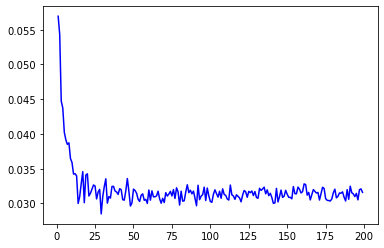

In [41]:
plt.plot(list(range(1,200)), rmse, 'blue')

In [42]:
rmse_min = min(rmse)
print(rmse_min)
print(rmse.index(rmse_min))

0.028496660284001298
28


## AdaBoost Classifier

In [16]:
rmse = []
for i in range(1,200):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    rmse.append(mean_squared_error(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(prediction)))

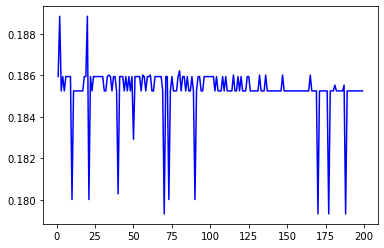

In [19]:
plt.plot(list(range(1,200)), rmse, 'blue')

In [20]:
rmse_min = min(rmse)
print(rmse_min)
print(rmse.index(rmse_min))

0.17931709172212798
69
